In [1]:
%%capture
! pip install seaborn

In [266]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
from IPython.display import display
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [349]:
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing

# Background Information

##### A year prior to this data, companies 'AB' a 'C' merged to form a larger, rebranded company.

##### Immediately after, management consultants were brought in to reorganize the enterprise focusing primarily on labor cost synergies and streamling the organizational structure.

##### For the past two quarters sales have fallen short of targets.

##### 4 Key Pain-Points: Workload, Performance Pressure, Inefficient Sales Strategy, Employee Disengagement

##### Can we glean any interesting information from the behavioral data that would help address these issues and can we make any actionable recommendations?

In [242]:
#Import the data
df = pd.read_excel(r'desktop/Contoso.xlsx')

In [4]:
#Turn categorical performance data into numerical data. Identify a new employee as "New" and not NaN
cleanup_key = {'Performance':{'Strongly Exceeds Expectations':5, 'Exceeds Expectations':4, 'Meets Expectations':3,
                              'Sometimes Meets Expectations':2, 'Does Not Meet Expectations':1},
              'Original Company':{np.nan:'New'}}

In [241]:
new_df = pd.DataFrame(df.replace(cleanup_key))

# Exploring the Data

##### Getting a feel for the data:

In [316]:
new_df.describe()

,PID,Manager,Performance,Quota Attainment,Engagement Index,Utilization,Collaboration Hours,Meetings Attended,Sent Emails,Received Emails,Meeting Hours,Mail Hours,Internal Collaboration Hours,External Collaboration Hours,Internal Meeting Hours,External Meeting Hours,Internal Mail Hours,External Mail Hours,Overload,Meeting Overload,Email Overload,Focus Time Blocks,Recurring Meeting Hours,Non-Recurring Meeting Hours,Too Many Mails Hours,Double Booked Hours,Redundant Hours,Meeting Hours with Level Above,Meeting Hours with Level Below,Meeting Hours with Level Same,Meeting Hours with Level Skip,Hours with Manager,1:1 Manager Hours,Mtgs Hrs <15,Mtgs Hrs 15-29,Mtgs Hrs 30-59,Mtgs Hrs 1-2h,Mtgs Hrs 2-8h,Mtgs Hrs 8h+,Mtg Hrs 1 Att,Mtg Hrs 2 Att,Mtg Hrs 3 to 6 Att,Mtg Hrs 7 to 10 Att,Mtg Hrs 11 to 20 Att,Mtg Hrs 21+ Att,Internal Network Size,External Network Size,External Network Breadth,Centrality
count,31143.000000,31122.000000,28245.000000,2751.000000,29988.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000,31143.000000
mean,49496.738368,48756.665992,3.432714,0.958473,3.591036,44.445076,17.967299,12.622162,53.231994,116.086825,9.327049,8.640250,11.203506,6.763793,6.133439,3.193610,5.070067,3.570183,4.878258,2.321122,2.557136,7.020871,3.564968,5.762081,3.179385,1.735591,4.500941,1.580853,1.147561,2.619430,0.787567,3.192278,0.182556,0.169868,0.319580,3.029826,4.606998,1.172816,0.008220,0.918753,1.400287,3.227435,1.105362,1.166177,1.489294,35.500466,24.054812,6.913046,0.319008
std,28545.836419,27220.808196,1.106997,0.244908,1.019150,16.371976,7.928595,6.589281,40.926488,90.065936,5.251684,5.334975,6.412562,6.040192,4.611085,3.572582,4.119422,4.233991,3.717734,1.980714,2.710948,3.589621,2.805681,3.989998,3.758518,1.907480,3.962081,1.561991,2.387968,2.474035,0.801530,2.403017,0.255450,0.208447,0.351015,2.233777,3.556865,1.691303,0.256312,2.350249,2.861468,4.101320,2.460684,2.562818,2.892122,23.085100,16.099617,6.410168,0.134943
min,115.000000,1435.000000,1.000000,0.520000,1.000000,4.300000,0.100000,0.000000,1.000000,1.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.010000
25%,25176.000000,25440.000000,3.000000,0.790000,3.000000,31.800000,12.300000,8.000000,22.000000,50.000000,5.500000,4.800000,6.700000,2.500000,2.800000,0.600000,2.100000,0.800000,2.300000,0.900000,0.800000,4.000000,1.600000,2.900000,0.600000,0.500000,1.400000,0.400000,0.000000,0.900000,0.200000,1.500000,0.000000,0.000000,0.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,13.000000,1.000000,0.220000
50%,48408.000000,46514.000000,3.000000,0.940000,4.000000,42.700000,16.700000,12.000000,46.000000,99.000000,8.500000,7.500000,10.200000,4.900000,5.300000,2.100000,4.200000,2.100000,3.800000,1.800000,1.600000,7.000000,2.900000,4.900000,2.000000,1.200000,3.700000,1.200000,0.000000,2.000000,0.600000,2.700000,0.000000,0.000000,0.250000,2.500000,4.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,33.000000,22.000000,5.000000,0.300000
75%,73643.000000,70684.000000,4.000000,1.090000,4.000000,55.400000,22.300000,16.000000,76.000000,162.000000,12.100000,11.400000,14.600000,9.200000,8.500000,4.600000,7

## Organizational Structure

##### Below we see an organization with 7 layers. The CEO came from the original company 'AB' and of the organizational leadership (L0 - L2) there are twice as many from the original company as from co. 'C'. Were some of the leadership from company 'C' made redundant in the labor cost synergies efforts?

In [6]:
layer = new_df.groupby(['Layer','Original Company'])['PID'].nunique()
layer

Layer  Original Company
L0     AB                    1
L1     AB                    4
       C                     2
L2     AB                   12
       C                     6
       New                   1
L3     AB                   54
       C                    39
       New                   4
L4     AB                  218
       C                   195
       New                  15
L5     AB                  320
       C                   394
       New                  42
L6     AB                  122
       C                    43
       New                  11
Name: PID, dtype: int64

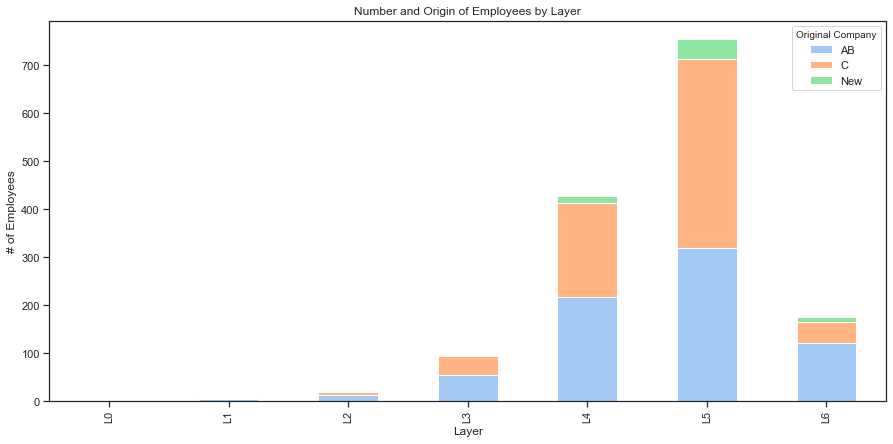

In [240]:
fig, ax = plt.subplots(figsize=(15,7))
layer.unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Number and Origin of Employees by Layer')
plt.xlabel('Layer')
plt.ylabel('# of Employees')
plt.show()

##### Below we see a general breakdown of the number of job titles filled by employees coming from either company 'AB', 'C', or new hires.

In [239]:
level = new_df.groupby(['Level','Original Company'])['PID'].nunique()

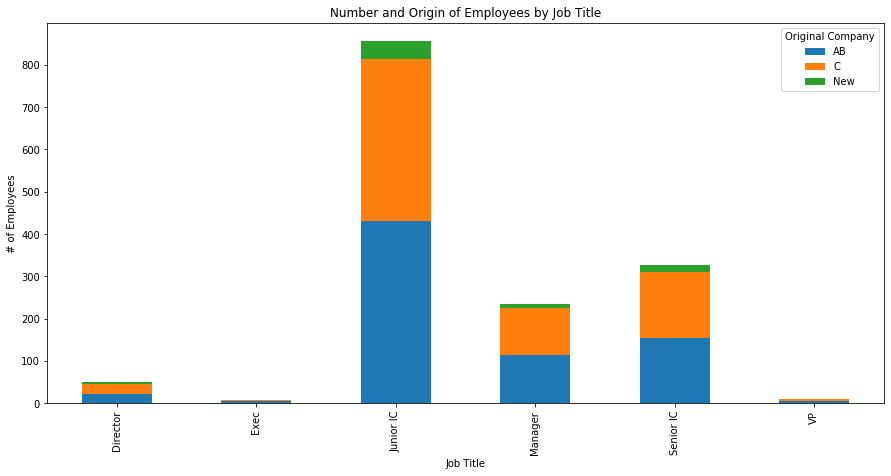

In [28]:
fig, ax = plt.subplots(figsize=(15,7))
level.unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Number and Origin of Employees by Job Title')
plt.xlabel('Job Title')
plt.ylabel('# of Employees')
plt.show()

##### Below we see how many employees and from which company (or new hires) work in each organizational unit.

In [238]:
org = new_df.groupby(['Organization','Original Company'])['PID'].nunique()

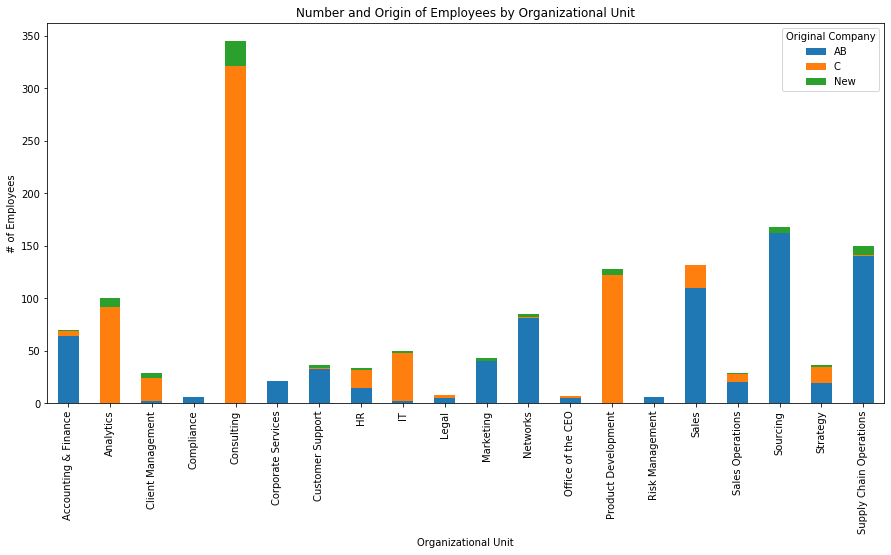

In [29]:
fig, ax = plt.subplots(figsize=(15,7))
org.unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Number and Origin of Employees by Organizational Unit')
plt.xlabel('Organizational Unit')
plt.ylabel('# of Employees')
plt.show()

##### It's interesting to note that employees coming from company 'C' seem to be concentrated in certain organizational groups and also make up the majority of these organizational groups. This could be a cause of 'disengagement' with the new larger company as it seems employees seem to be sticking with, or grouped with, employees predominantly from their original company.

##### Some questions that arise: Was this a merger between companies that did two different things and were looking to expand their joint offering? If not, why are employees segemented the way they are? 

### Looking at the Makeup and Performance of the Sales Group

##### Below we see the features that correlate most strongly with Quota Attainment. The manager correlation has to be disregarded for now because it is just the manager PID which wouldn't mean much UNLESS PID's increased based on length of service. I.E. the first employee has a PID of '1' and the 1000th employee has a PID of 1000. If this were the case, then the strong negative correlation would suggest that the managers with more experience and time with the company lead more successful teams. This is definitely something to follow up on! On the whole, though, correlations are very weak. It tends to lead to the conclusion that experience and familiarity with the sales process is most indicative of attaining the sales quota, as we'll see from the data.

In [293]:
sales_corr_df = new_df.corr()['Quota Attainment'][:-1]
sales_corr_list = sales_corr_df[abs(sales_corr_df)>0.1].sort_values(ascending=False)
print('There are {} correlated values with Quota Attainment: \n{}'.format(len(sales_corr_list),
     sales_corr_list))

There are 4 correlated values with Quota Attainment: 
Quota Attainment    1.000000
Engagement Index    0.152832
Overload            0.100145
Manager            -0.306294
Name: Quota Attainment, dtype: float64


##### Below we see how many and where employees came from in each sales region. There are no new hires in the sales department.

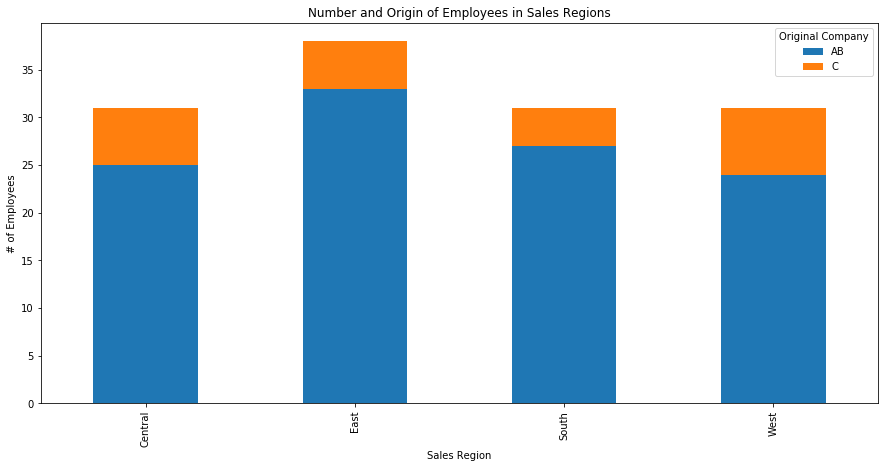

In [50]:
sales_df = new_df[new_df['Organization']=='Sales']
sales_df = sales_df[sales_df.Group != 'Office of the CCO']
pd.options.display.max_columns = None
sales_df.head()
sales = sales_df.groupby(['Region','Original Company'])['PID'].nunique()

fig, ax = plt.subplots(figsize=(15,7))
sales.unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Number and Origin of Employees in Sales Regions')
plt.xlabel('Sales Region')
plt.ylabel('# of Employees')
plt.show()

#### We can see above that although employees originally from company 'C' are outnumbered, they are evenly distributed across geographic regions and should be learning/being integrated by their Company 'AB' colleagues, but...

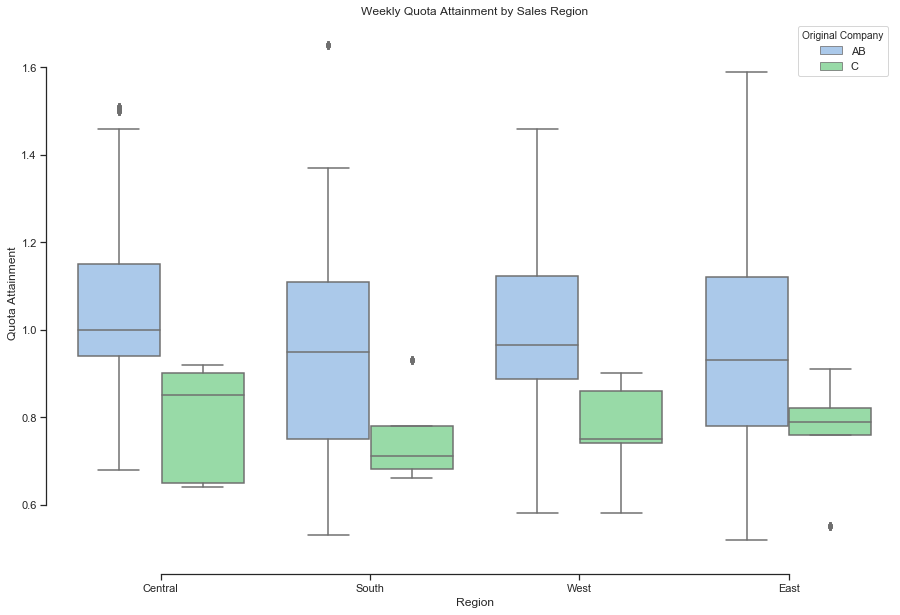

In [69]:
quota_attain = sales_df.groupby(['Region','Original Company'])['Quota Attainment'].mean()

plt.figure(figsize = (15,10))
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Region", y="Quota Attainment",
            hue="Original Company", palette=["b", "g"],
            data=sales_df).set_title('Weekly Quota Attainment by Sales Region')
sns.despine(offset=10, trim=True)

#### ...as we see above, they are consistently underperforming their company 'AB' colleagues. Why?

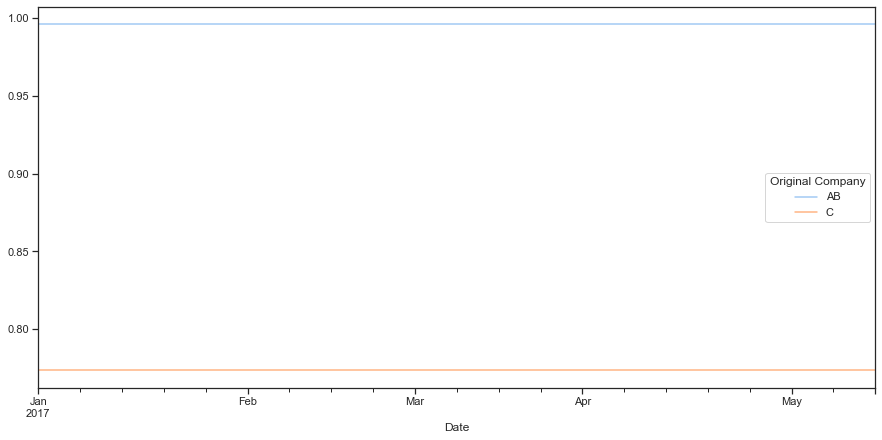

In [75]:
fig, ax = plt.subplots(figsize=(15,7))
sales_df.groupby(['Date','Original Company'])['Quota Attainment'].mean().unstack().plot(ax=ax)

##### Looking at the above time-series graph we see something peculiar: either every week the average quota attainment magically stays the same--meaning if one employee misses by 10%, another employee exceeds by that same amount. every week. for the entire time period--or when the data was input, it was done on an average basis at the end, and not on a rolling weekly basis. In any case, the time series data doesn't tell us much. The same can be said for Engagement and Performance measures (values stayed the same every week across the entire time period).

##### It suggests that there is no sales quota improvement over time, which would be quite odd.


##### /

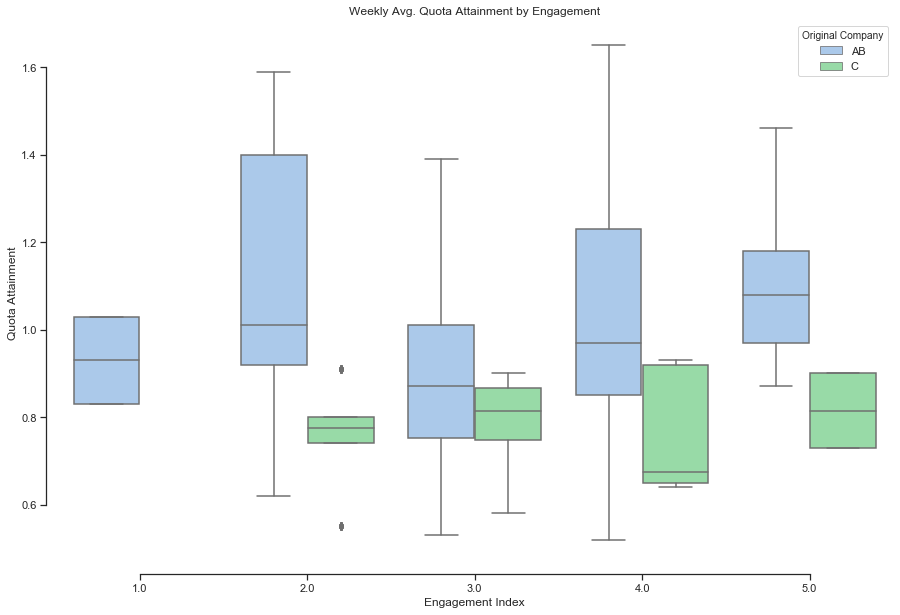

In [99]:
plt.figure(figsize = (15,10))
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Engagement Index", y="Quota Attainment",
            hue="Original Company", palette=["b", "g"],
            data=sales_df).set_title('Weekly Avg. Quota Attainment by Engagement')
sns.despine(offset=10, trim=True)

##### Again, and referencing the graph above, we can draw very few conclusions about quota attainment, if any, based on the engagement index other than engagement doesn't appear to have any meaningful effect on attaining sales quotas.


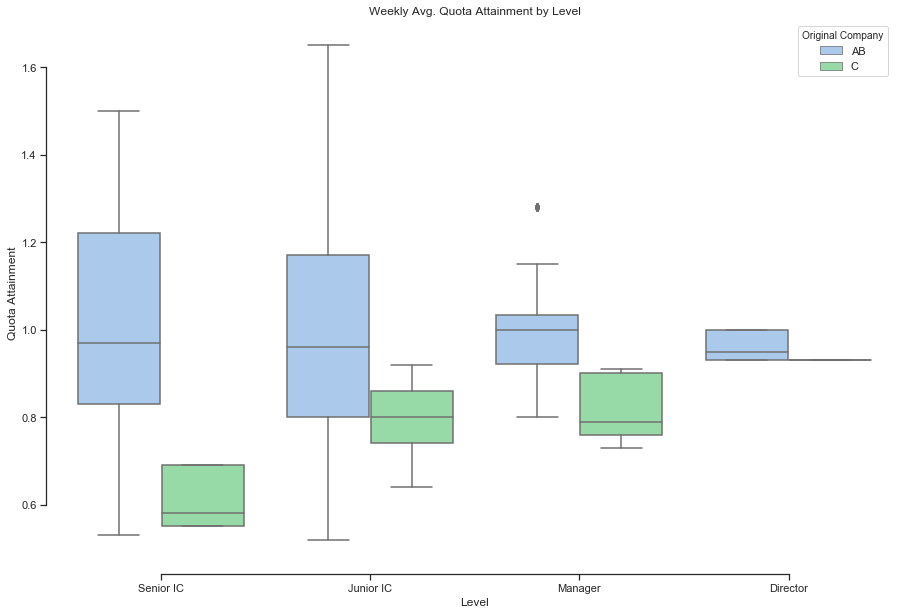

In [98]:
plt.figure(figsize = (15,10))
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Level", y="Quota Attainment",
            hue="Original Company", palette=["b", "g"],
            data=sales_df).set_title('Weekly Avg. Quota Attainment by Level')
sns.despine(offset=10, trim=True)

##### The Senior IC level employees from company 'C' are massively underperforming. Employees from Company 'AB' seem to be performing well across all levels, with the Managers and Directors not having quite so much variance.

##### We note again that it's company 'C' employees that are underperforming across the board.

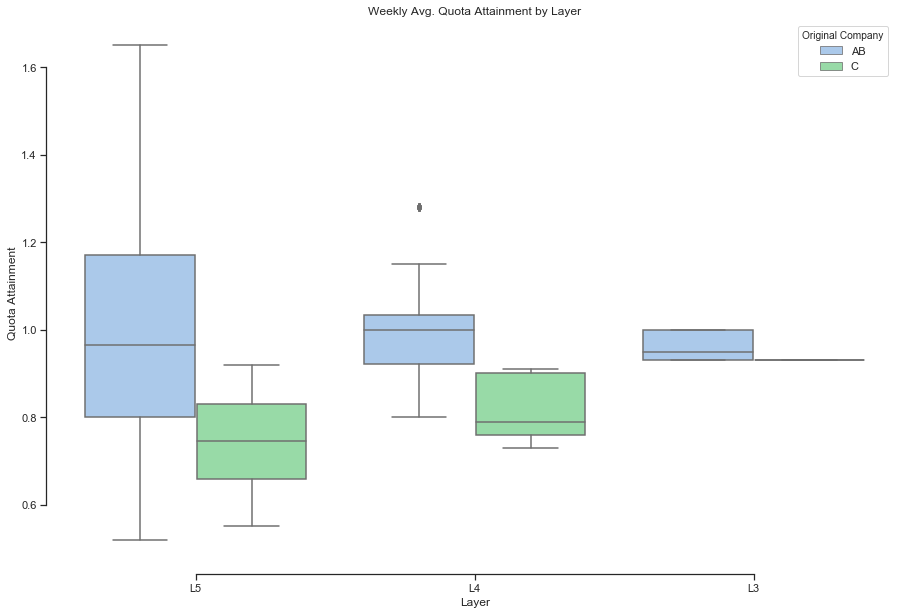

In [100]:
plt.figure(figsize = (15,10))
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Layer", y="Quota Attainment",
            hue="Original Company", palette=["b", "g"],
            data=sales_df).set_title('Weekly Avg. Quota Attainment by Layer')
sns.despine(offset=10, trim=True)

##### Not much difference apart from consistency across the layers for company 'AB', but we see as we go up in layers there is increased quota attainment from company 'C' employees 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

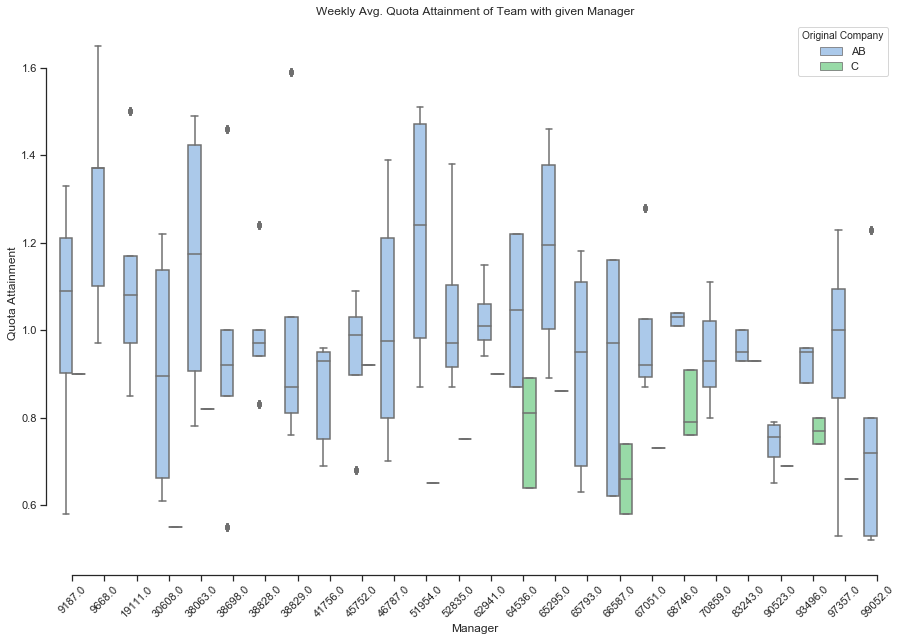

In [97]:
plt.figure(figsize = (15,10))
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Manager", y="Quota Attainment",
            hue="Original Company", palette=["b", "g"],
            data=sales_df).set_title('Weekly Avg. Quota Attainment of Team with given Manager')
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)

##### Here (above) we are seeing average team performance broken down by manager (denoted by their PID). Most teams are filled with employees from company 'AB' and 1 employee from company 'C' (distinguishable by just the horizontal line rather than a green box). There are four teams with more than one employee from comany 'C'. Across the board the company 'C' team members are underperforming.

In [180]:
# Creates a data frame grouped by sales managers with some key behavioral traits about the team under that manager
managers = pd.DataFrame(sales_df.groupby(['Manager']).agg({'Quota Attainment':'mean',
                                                                        'Engagement Index':'mean', '1:1 Manager Hours':'mean',
                                                   'Utilization':'mean' , 'Meetings Attended':'mean',
                                                   'Collaboration Hours':'mean','Internal Collaboration Hours':'mean',
                                                   'External Collaboration Hours':'mean'}))
managers.sort_values(by='Quota Attainment', ascending=False, inplace=True)
managers.reset_index(inplace=True)
managers.columns = ['Manager','Quota Attainment','Engagement','1:1 Manager Hours','Weekly Hours','Meetings Attended',
                  'Collaboration Hours','Internal Collaboration Hours','Extrenal Collaboration Hours']
managers = managers.astype({'Manager':'int32'})

In [168]:
#Creates a list of the managers' PIDs and exports their information to an excel file
manager_list=managers['Manager'].astype(int).tolist()
new_df[new_df['PID'].isin(manager_list)].to_excel('desktop/manager_list.xlsx')

In [179]:
#Cleaned the excel file up to create a dictionary of the managers' PIDs and which company they are from
#Added to the managers data frame so now see the Manager, which company they are from, and their teams' behaviors
my_dict = pd.read_excel('desktop/manager_list.xlsx').set_index('PID')['Original Company'].to_dict()
manager_list = managers['Manager'].apply(lambda x: my_dict.get(x))
managers['Original Company'] = manager_list
managers

,Manager,Quota Attainment,Engagement,1:1 Manager Hours,Weekly Hours,Meetings Attended,Collaboration Hours,Internal Collaboration Hours,Extrenal Collaboration Hours,Original Company
0,9668,1.292000,4.400000,0.202857,49.821905,11.190476,18.670476,7.874286,10.796190,AB
1,65295,1.120000,2.600000,0.155714,48.341905,11.419048,17.951429,7.638095,10.313333,AB
2,19111,1.114000,4.400000,0.220476,41.578095,15.219048,18.231429,9.250476,8.980952,AB
3,51954,1.102000,4.000000,0.229524,42.651429,14.647619,17.481905,7.767619,9.714286,AB
4,38063,1.088000,3.000000,0.153333,47.587619,11.657143,18.117143,7.251429,10.865714,AB
5,38829,1.012000,3.000000,0.190476,48.913333,11.180952,17.308571,8.354286,8.954286,AB
6,46787,1.008333,3.000000,0.162698,48.356349,10.738095,17.521429,7.258730,10.262698,AB
7,62941,1.002000,4.800000,0.179048,49.157143,23.923810,26.524762,11.628571,14.896190,AB
8,9187,0.998000,4.000000,0.179524,47.809524,11.409524,17.267619,7.363810,9.903810,AB
9,38828,0.996000,4.000000,0.190476,41.367619,13.428571,16.909524,7.166667,9.742857,AB


##### In the above table we have all the sales managers, the average weekly behavioral stats of their teams, and the manager's original company. It is interesting to note that the top 10 teams all have managers from company 'AB' and apart from one exception, all of the company 'C' managers inhabit the bottom half of the table.

##### It can generally be said that the higher acheiving teams are more engaged, by about 16%, but overall the data is littered with outliers across every category making it difficult to say without a doubt certain behaviors are responsible for better sales performance.

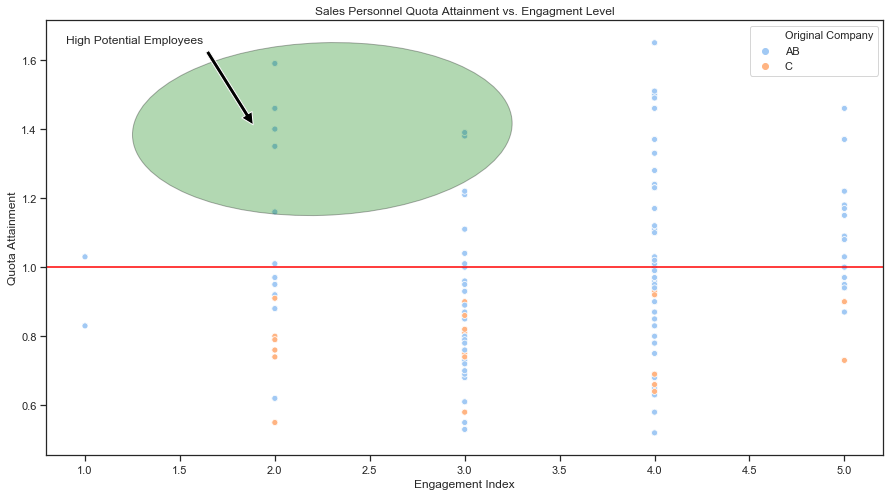

In [306]:
plt.figure(figsize=(15,8))
plt.title('Sales Personnel Quota Attainment vs. Engagment Level')
ax = sns.scatterplot(x="Engagement Index", y="Quota Attainment", hue="Original Company", data=sales_df)
plt.annotate('High Potential Employees',xy=(1.9,1.4),xytext=(0.9,1.65),
             arrowprops=dict(facecolor='black', shrink=0.05))

ax.add_patch(patches.Ellipse((2.25, 1.4),2,0.5,1,alpha=0.3, facecolor="green", edgecolor="black", 
                             linewidth=1, linestyle='solid'))
plt.axhline(1,color='red')


#### The above graph shows an example of "high-potential" sales employees. These are employees that, despite not being engaged, are still finding a way to outperform. If they were to become engaged with the company and gain the advantages that brings, they could be superstar sellers. This is, however, a somewhat tenuous argument as the correlation between engagement and quota attainment is the strongest among features, it is still pretty weak.

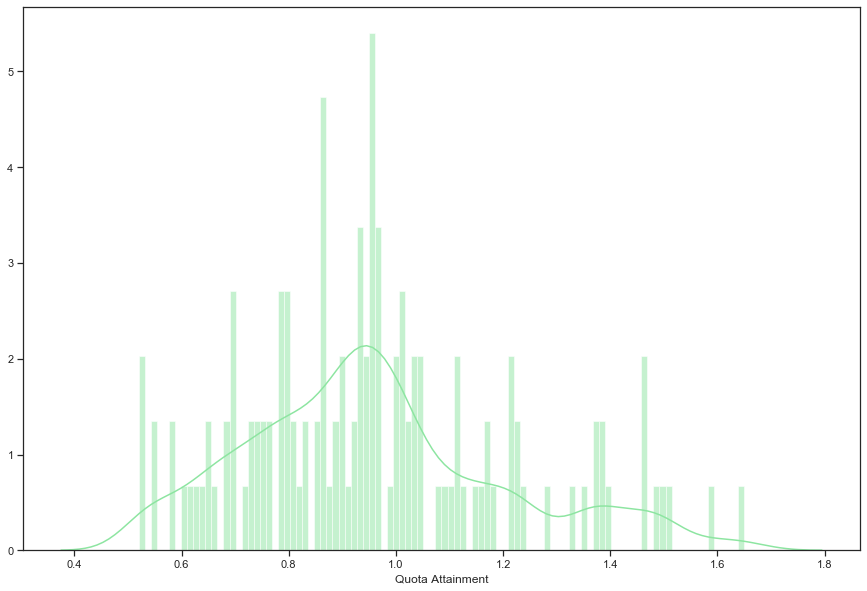

In [276]:
plt.figure(figsize=(15,10))
sns.distplot(sales_df['Quota Attainment'], color='g', bins=100, hist_kws={'alpha':0.5})

##### Above we have a histogram of sales performance. We see a messy distribution with a lot of outliers. This will be problematic when training a data model because on the one hand outliers should be removed but on the other hand, it would appear there are so many we won't have much data left to train.

## Exploring Issues with Performance (non-sales positions)


In [198]:
non_sales_df = new_df[new_df['Organization']!='Sales']


In [295]:
non_sales_corr_df = new_df.corr()['Performance'][:-1]
non_sales_corr_list = non_sales_corr_df[abs(non_sales_corr_df)>0.1].sort_values(ascending=False)
print('There are {} correlated values with Performance: \n{}'.format(len(non_sales_corr_list),
     non_sales_corr_list))

There are 8 correlated values with Performance: 
Performance            1.000000
Engagement Index       0.256573
Collaboration Hours    0.136055
Overload               0.129955
Meeting Overload       0.120840
Utilization            0.115295
Meetings Attended      0.109206
Meeting Hours          0.104414
Name: Performance, dtype: float64


##### Above we see more features correlated with Performance and Quota Attainment, but again, the correlations are very weak.

In [203]:
performance_level = non_sales_df.groupby(['Level','Original Company'])['Performance'].mean()

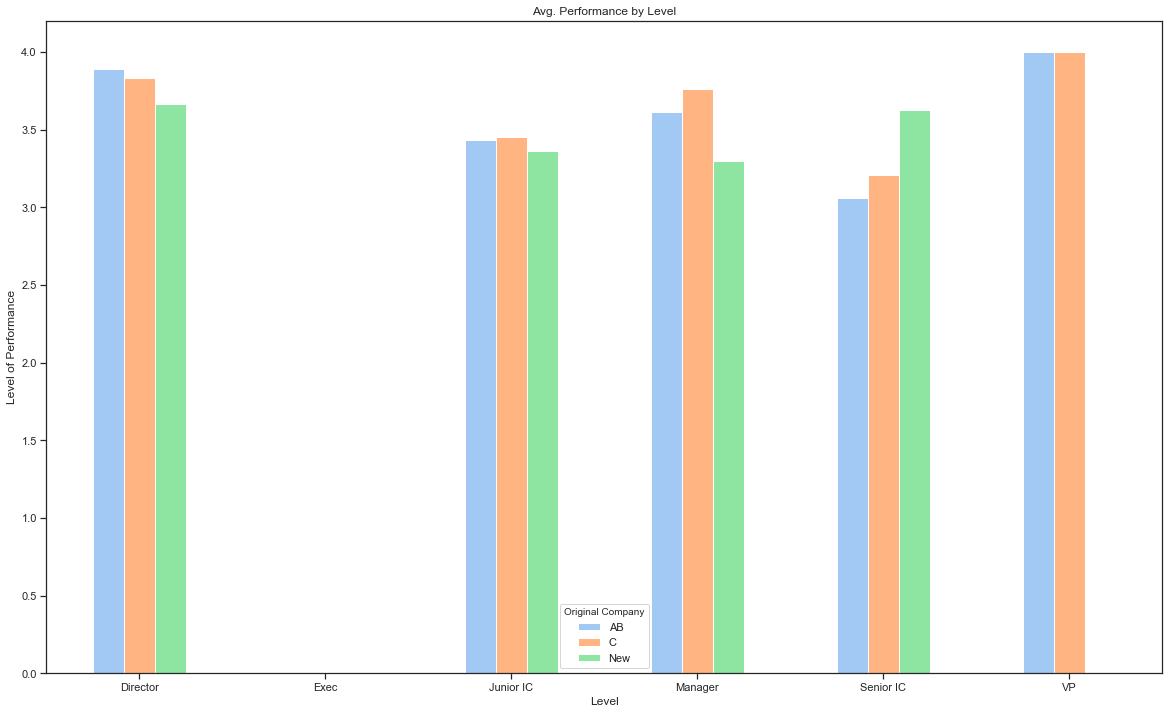

In [217]:
fig, ax = plt.subplots(figsize=(20,12))
performance_level.unstack().plot(kind='bar', ax=ax)
plt.title('Avg. Performance by Level')
plt.xlabel('Level')
plt.ylabel('Level of Performance')
plt.xticks(rotation=0)
plt.show()

##### As seen above, it looks like across all levels, employees are performing at or a bit above average.

In [205]:
performance_layer = non_sales_df.groupby(['Layer','Original Company'])['Performance'].mean()

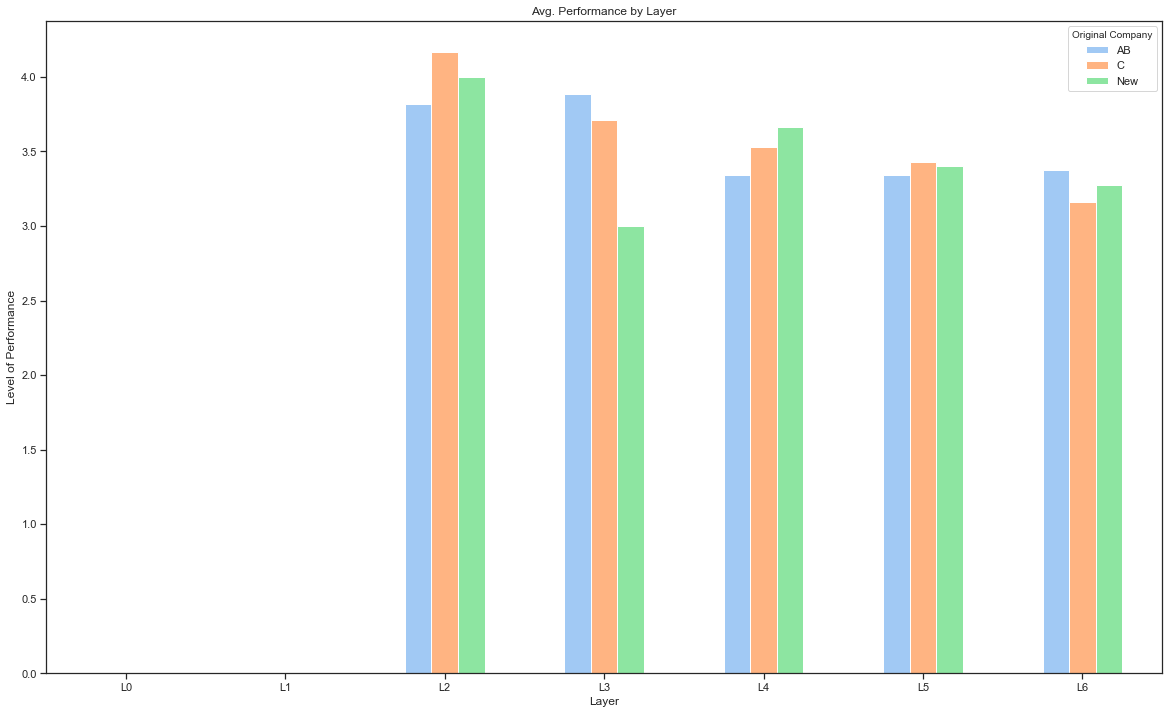

In [216]:
fig, ax = plt.subplots(figsize=(20,12))
performance_layer.unstack().plot(kind='bar', ax=ax)
plt.title('Avg. Performance by Layer')
plt.xlabel('Layer')
plt.ylabel('Level of Performance')
plt.xticks(rotation=0)
plt.show()

##### Above it is interesting to note that the lower one goes down in the hierarchy, the lower the average performance. 

In [212]:
performance_executive = non_sales_df.groupby(['Executive','Original Company'])['Performance'].mean()

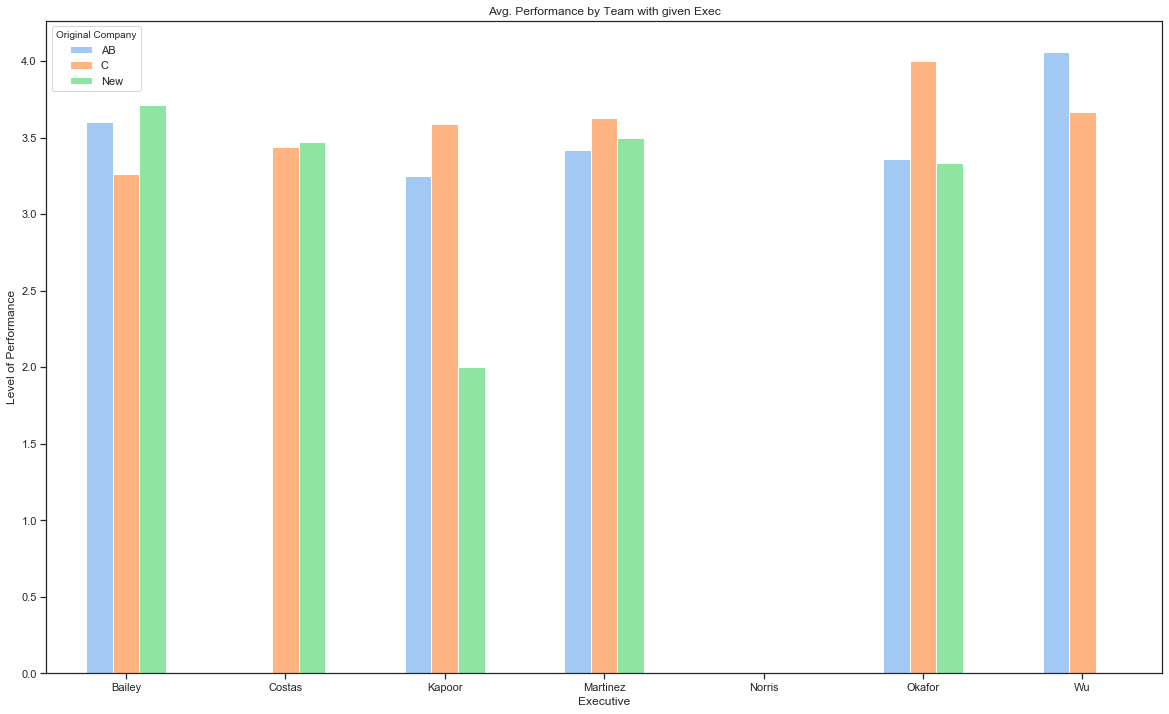

In [218]:
fig, ax = plt.subplots(figsize=(20,12))
performance_executive.unstack().plot(kind='bar', ax=ax)
plt.title('Avg. Performance by Team with given Exec')
plt.xlabel('Executive')
plt.ylabel('Level of Performance')
plt.xticks(rotation=0)
plt.show()

##### One things sticks out above--new hires under the leadership of Kapoor seem to be struggling.

In [220]:
performance_organization = non_sales_df.groupby(['Organization','Original Company'])['Performance'].mean()

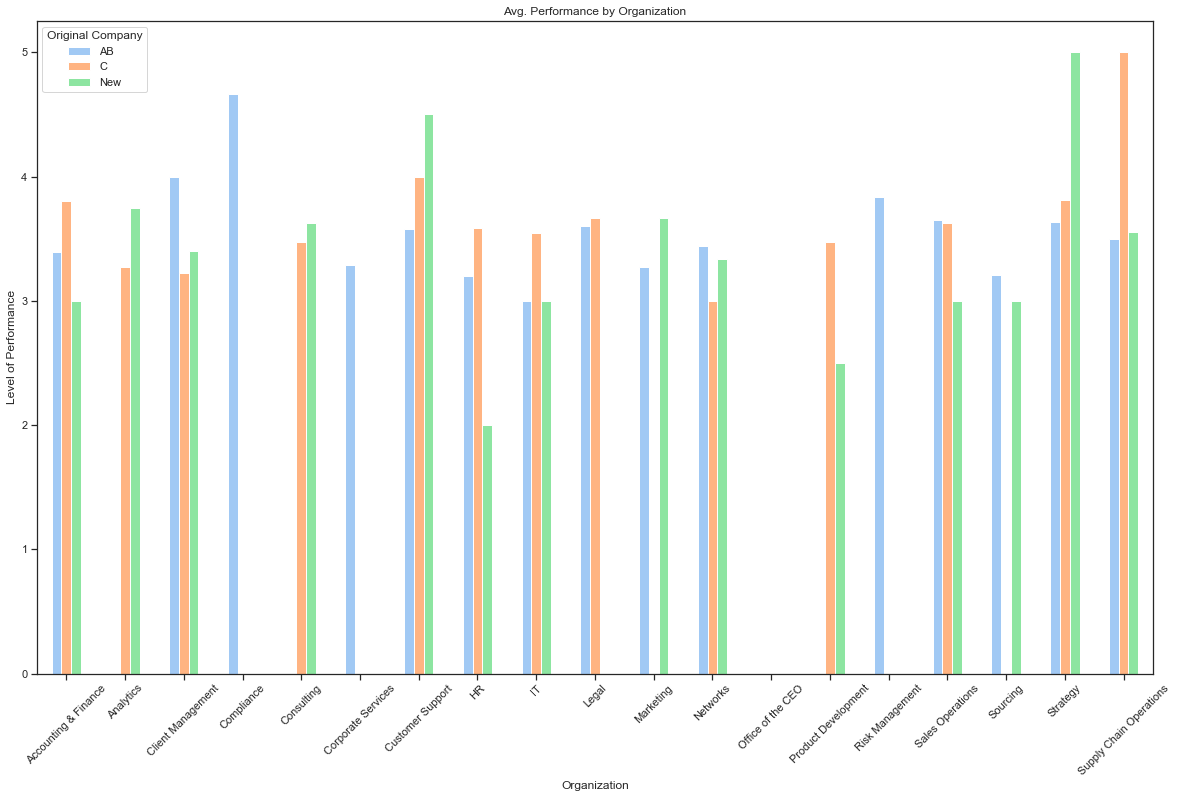

In [403]:
fig, ax = plt.subplots(figsize=(20,12))
performance_organization.unstack().plot(kind='bar', ax=ax)
plt.title('Avg. Performance by Organization')
plt.xlabel('Organization')
plt.ylabel('Level of Performance')
plt.xticks(rotation=45)
plt.show()

##### Kapoor is responsible for Corporate Services and HR. Corporate Services happens to only have emplyees from company 'AB' so the poor performance by new hires under the leadership of Kapoor is exclusively coming from HR. We see this poor performance in the graph above.


##### /

In [201]:
performance_group = non_sales_df.groupby(['Group','Original Company'])['Performance'].mean()

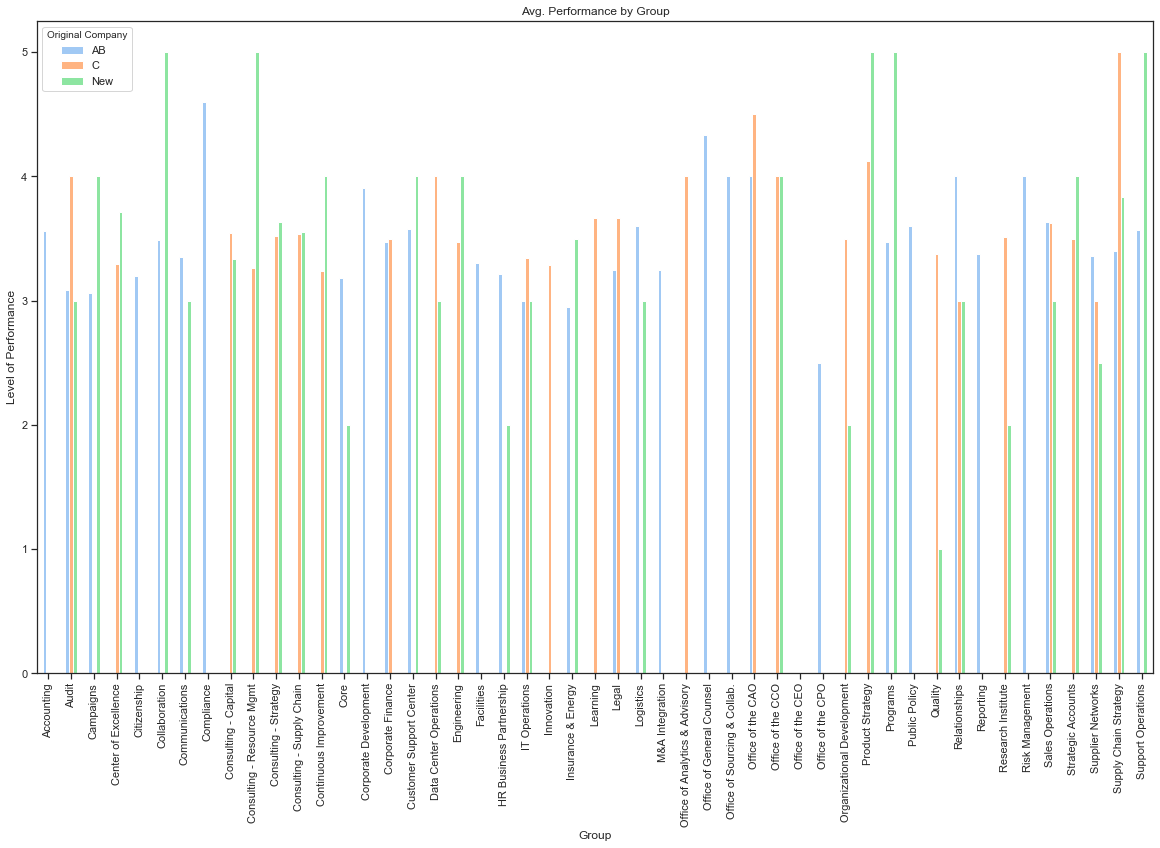

In [231]:
fig, ax = plt.subplots(figsize=(20,12))
performance_group.unstack().plot(kind='bar', ax=ax)
plt.title('Avg. Performance by Group')
plt.xlabel('Group')
plt.ylabel('Level of Performance')
plt.xticks(rotation=90)
plt.show()

##### The two areas of HR that have new hires are HR Business Partnerships and Organizational Development. In HR Business Partnerships there are no employees from company 'C' while in Organizational Development there are no employees from company 'AB' which implies the problem is not neccessarily working with employees from one of the two original companies, rather an issue of training/onboarding.

In [223]:
performance_region = non_sales_df.groupby(['Region','Original Company'])['Performance'].mean()

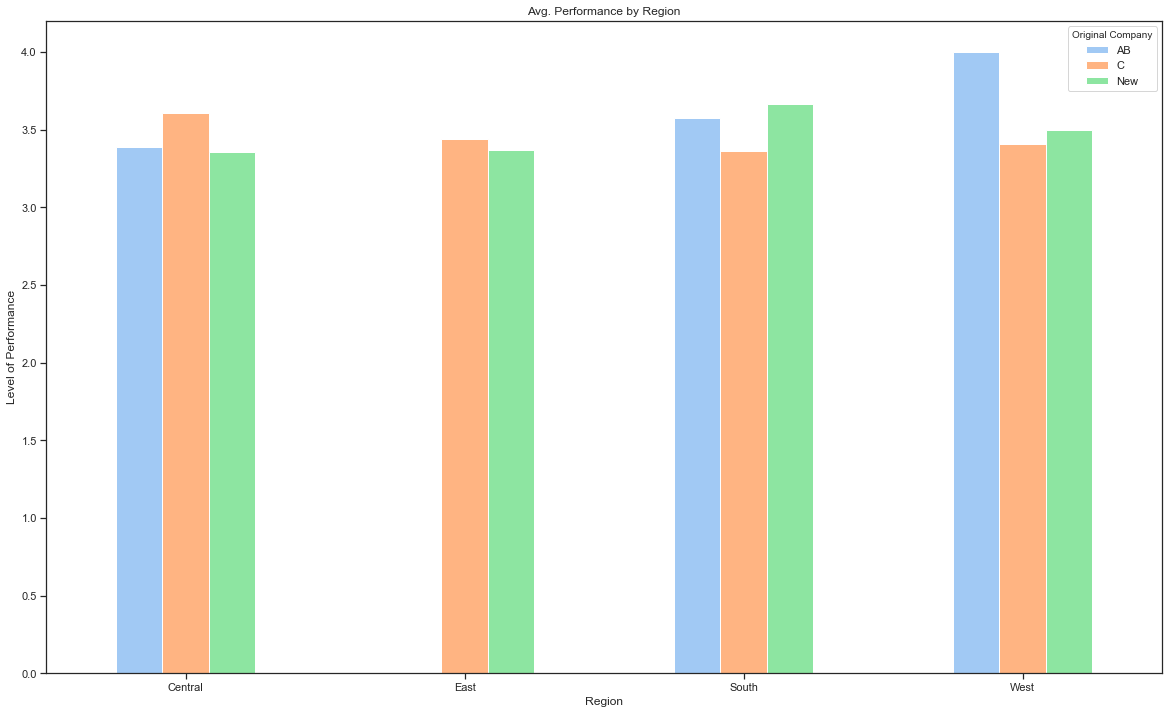

In [226]:
fig, ax = plt.subplots(figsize=(20,12))
performance_region.unstack().plot(kind='bar', ax=ax)
plt.title('Avg. Performance by Region')
plt.xlabel('Region')
plt.ylabel('Level of Performance')
plt.xticks(rotation=0)
plt.show()

##### There are no non-sales positions occupied by employees from company 'AB'. In fact, the only 'AB' employees in the eastern region are the 33 sales positions.

In [405]:
new_df.groupby(['Region','Original Company'])['PID'].nunique()

Region   Original Company
Central  AB                  611
         C                   164
         New                  31
East     AB                   33
         C                   310
         New                  19
South    AB                   60
         C                   114
         New                   9
West     AB                   27
         C                    91
         New                  14
Name: PID, dtype: int64

## Exploring Workload Issues

In [312]:
workload_organization = new_df.groupby(['Organization','Original Company'])['Utilization'].mean()

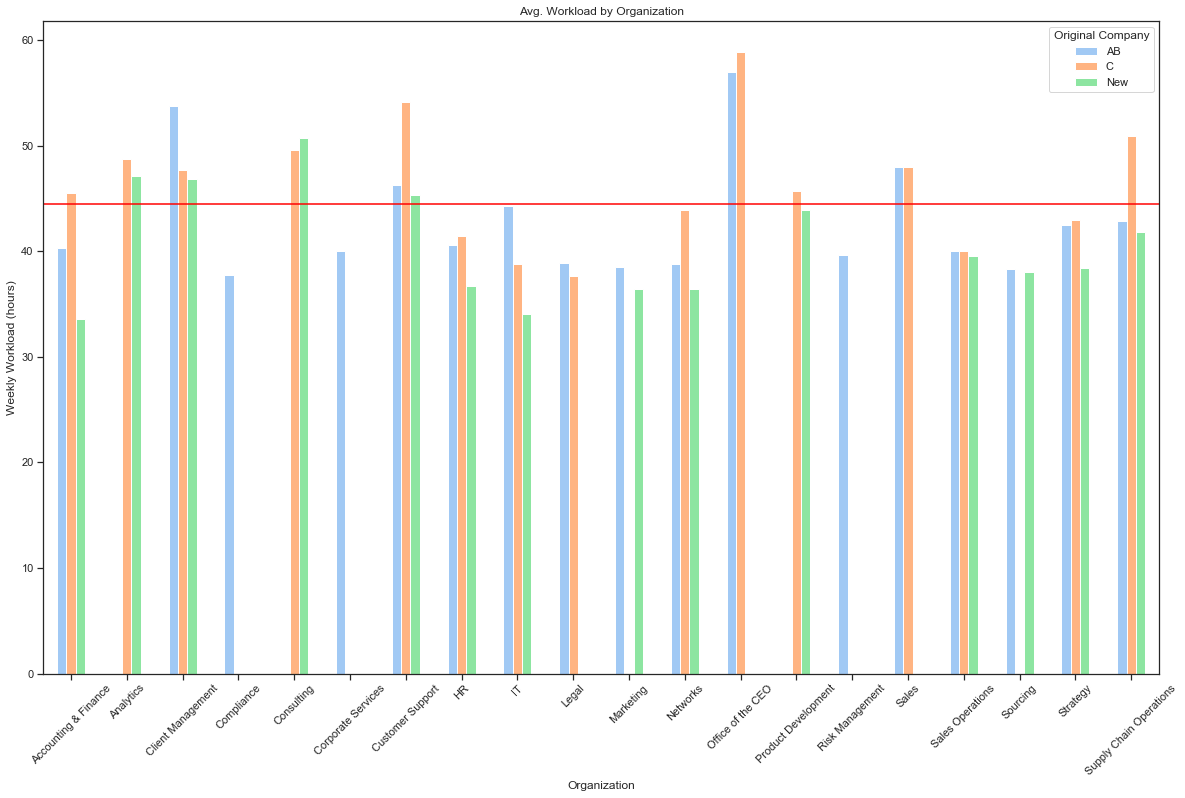

In [313]:
fig, ax = plt.subplots(figsize=(20,12))
workload_organization.unstack().plot(kind='bar', ax=ax)
plt.title('Avg. Workload by Organization')
plt.xlabel('Organization')
plt.ylabel('Weekly Workload (hours)')
plt.xticks(rotation=45)
plt.axhline(new_df['Utilization'].mean(),color='red')
plt.show()

##### It's worrisome to see big working hours discrepancies within an organization. We see that in Client Management, Customer Support, and Supply Chain Operations.

In [412]:
workload_df = new_df[(new_df['Organization']=='Client Management') | (new_df['Organization']=='Customer Support')
                    | (new_df['Organization']=='Supply Chain Operations')]

In [413]:
workload_group = workload_df.groupby(['Group','Original Company'])['Utilization'].mean()

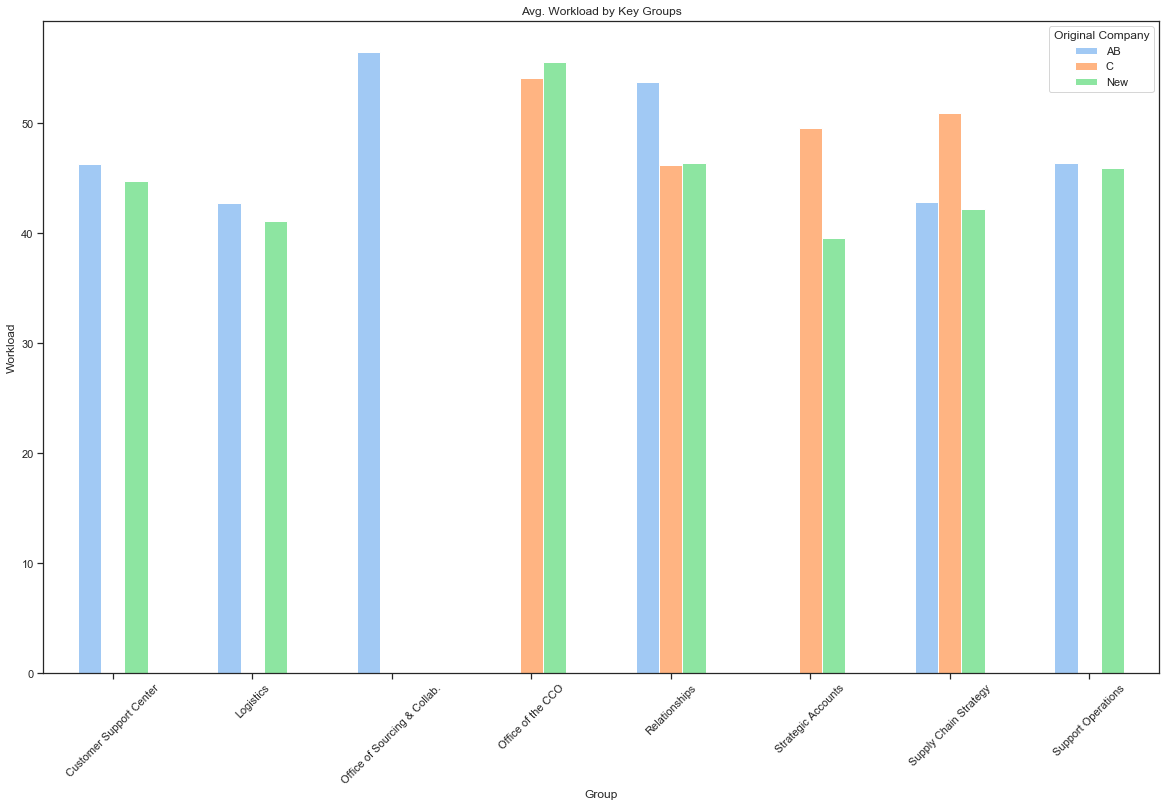

In [414]:
fig, ax = plt.subplots(figsize=(20,12))
workload_group.unstack().plot(kind='bar', ax=ax)
plt.title('Avg. Workload by Key Groups')
plt.xlabel('Group')
plt.ylabel('Workload')
plt.xticks(rotation=45)
plt.show()

##### We see a few big mis-matches here in Strategic Accounts, Supply Chain Strategy and Relationships. Also, the Office of Sourcing and Collaboration is working an awful lot.

In [314]:
overload_organization = new_df.groupby(['Organization','Original Company'])['Overload'].mean()


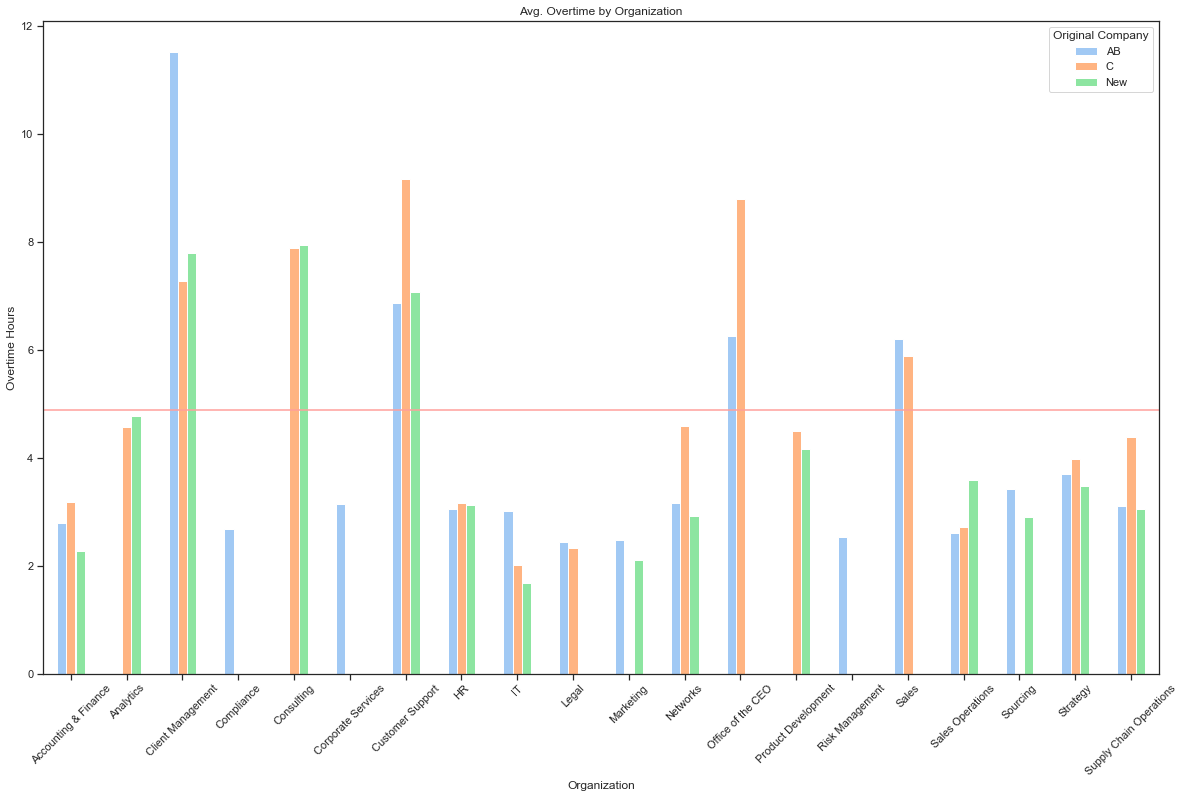

In [315]:
fig, ax = plt.subplots(figsize=(20,12))
overload_organization.unstack().plot(kind='bar', ax=ax)
plt.title('Avg. Overtime by Organization')
plt.xlabel('Organization')
plt.ylabel('Overtime Hours')
plt.xticks(rotation=45)
plt.axhline(new_df['Overload'].mean(),color='r')
plt.show()

##### We are again seeing big discrepancies within the organizational units of  Client Management, Customer Support, Supply Chain Operations, but also in Networks and the Office of the CEO

In [415]:
overload_df = new_df[(new_df['Organization']=='Client Management') | (new_df['Organization']=='Customer Support')
                    | (new_df['Organization']=='Supply Chain Operations')| (new_df['Organization']=='Networks')
                    | (new_df['Organization']=='Office of the CEO')]

In [420]:
overload_group = overload_df.groupby(['Group','Original Company'])['Overload'].mean()

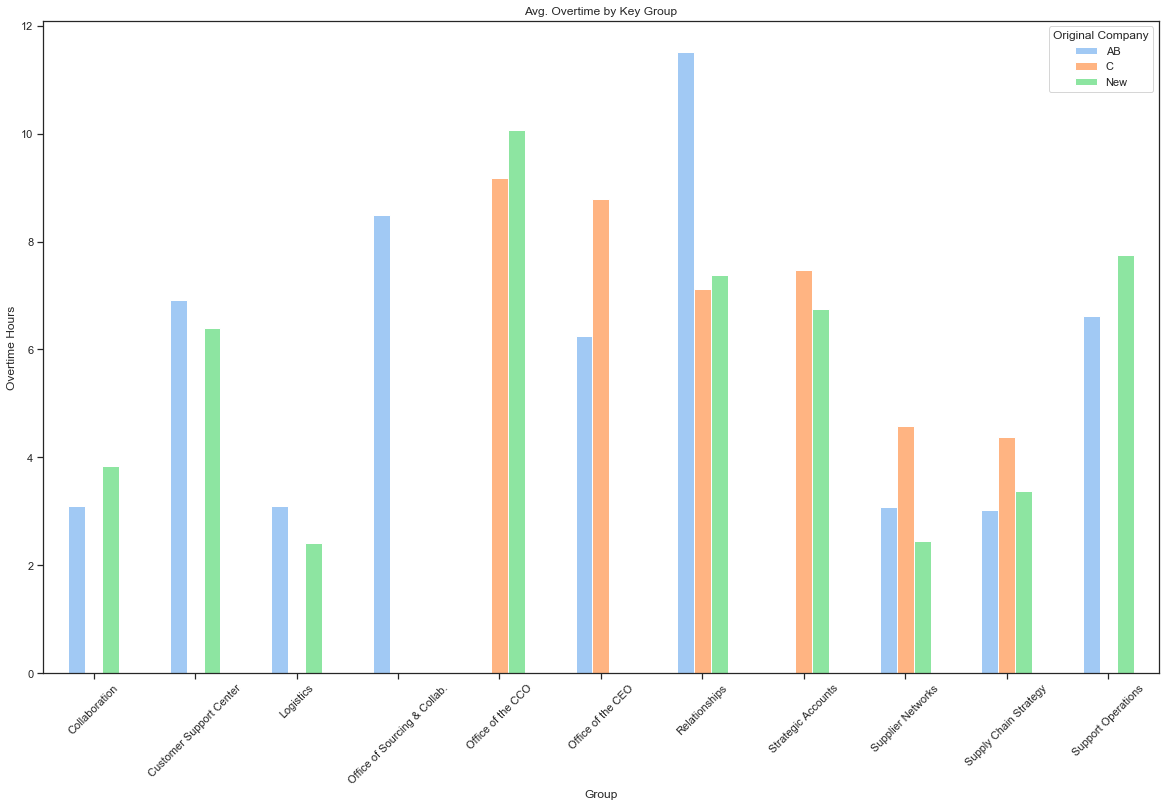

In [421]:
fig, ax = plt.subplots(figsize=(20,12))
overload_group.unstack().plot(kind='bar', ax=ax)
plt.title('Avg. Overtime by Key Group')
plt.xlabel('Group')
plt.ylabel('Overtime Hours')
plt.xticks(rotation=45)
plt.show()

##### Big mis-matches again in Relationships and the Office of the CEO. An interesting point to note: All of the client management offices are located in the West, yet sales and therefore presumably clients are located in four regions. If this is an American company, then that represents many time zones and could explain why all the Client Management teams seem to be working overtime--because their clients are in different time zones and therefore they must work out of hours to service them. Perhaps it would make sense to distribute this team across the various regions (again, assuming multiple time zones between regions).

## Exploring Company Engagement

##### What are the behavioral traits that drive engagement?

In [296]:
engagement_corr_df = new_df.corr()['Engagement Index'][:-1]
engagement_corr_list = engagement_corr_df[abs(engagement_corr_df)>0.1].sort_values(ascending=False)
print('There are {} correlated values with Engagement: \n{}'.format(len(engagement_corr_list),
     engagement_corr_list))

There are 16 correlated values with Engagement: 
Engagement Index                  1.000000
Performance                       0.256573
Meetings Attended                 0.170727
Internal Network Size             0.163399
Meeting Hours                     0.158529
Quota Attainment                  0.152832
Non-Recurring Meeting Hours       0.147839
Internal Meeting Hours            0.147301
1:1 Manager Hours                 0.129026
Mtgs Hrs 30-59                    0.121872
Internal Collaboration Hours      0.116499
Meeting Hours with Level Below    0.112955
Double Booked Hours               0.109816
Mtgs Hrs 1-2h                     0.107196
Meeting Hours with Level Same     0.102789
Email Overload                   -0.107231
Name: Engagement Index, dtype: float64


##### Disappointingly, again, we see weak correlations. Performance and Engagement seem to be a positive, albeit fairly weak, feedback loop.

In [406]:
engagement_region = new_df.groupby(['Region','Original Company'])['Engagement Index'].mean()

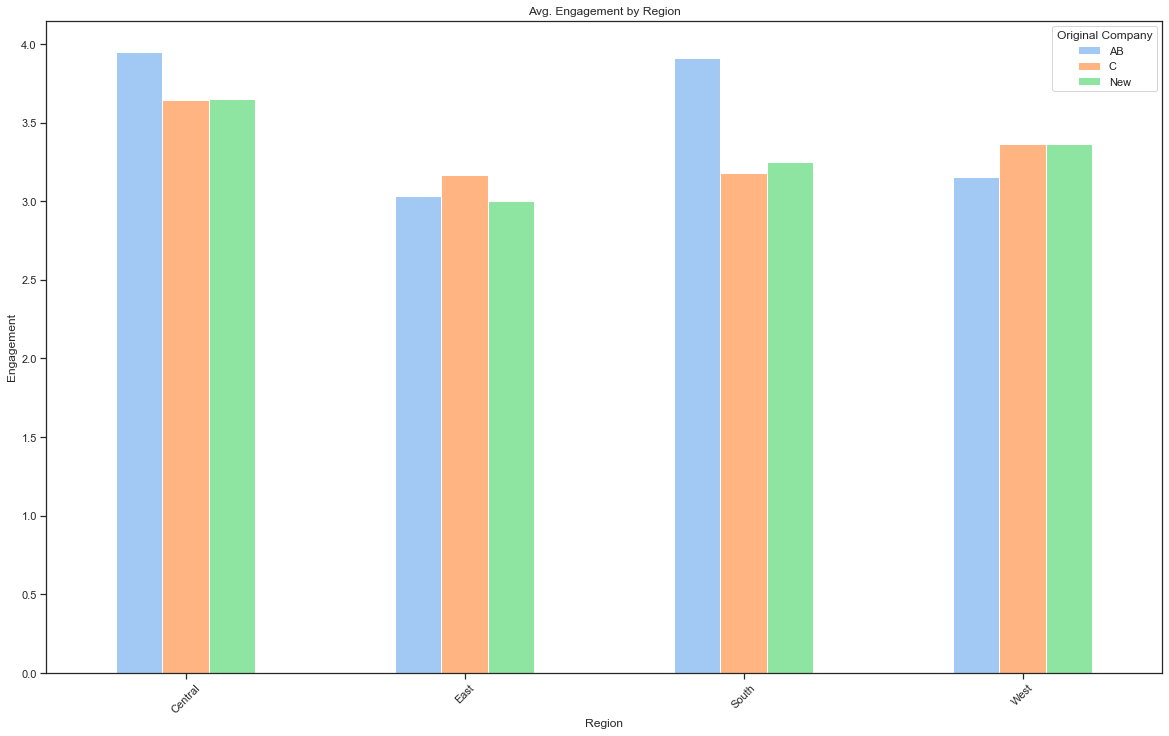

In [407]:
fig, ax = plt.subplots(figsize=(20,12))
engagement_region.unstack().plot(kind='bar', ax=ax)
plt.title('Avg. Engagement by Region')
plt.xlabel('Region')
plt.ylabel('Engagement')
plt.xticks(rotation=45)
plt.show()

##### If we recall, in the east there were very few employees from company 'AB' and as we see above, it is the least engaged region. The central region is large and has a lot of employees from both companies as well as new hires and it is by far the most engaged.

In [248]:
engagement_organization = new_df.groupby(['Organization','Original Company'])['Engagement Index'].mean()

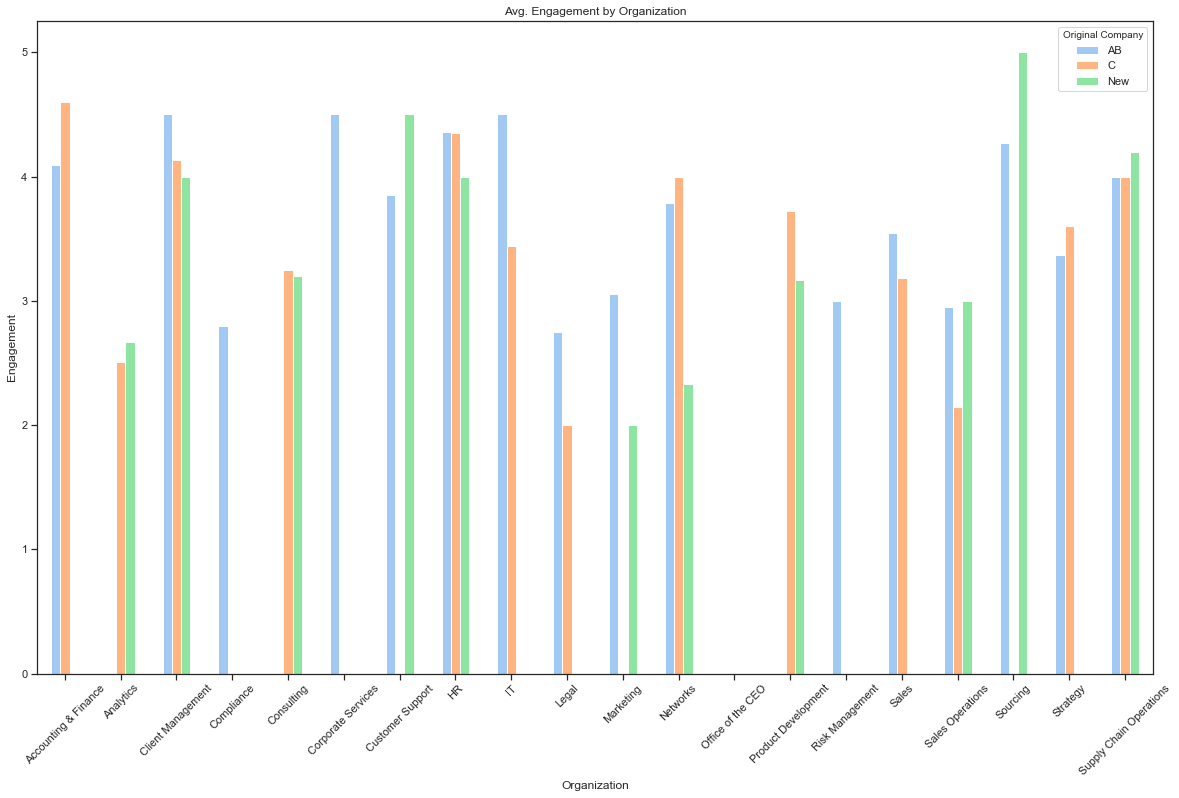

In [249]:
fig, ax = plt.subplots(figsize=(20,12))
engagement_organization.unstack().plot(kind='bar', ax=ax)
plt.title('Avg. Engagement by Organization')
plt.xlabel('Organization')
plt.ylabel('Engagement')
plt.xticks(rotation=45)
plt.show()

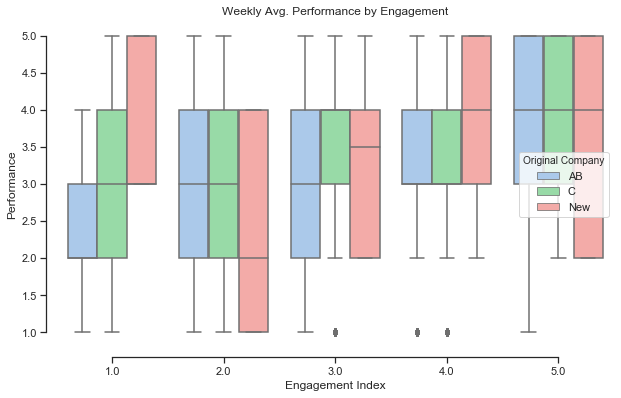

In [303]:
plt.figure(figsize = (10,6))
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Engagement Index", y="Performance",
            hue="Original Company", palette=["b", "g","r"],
            data=new_df).set_title('Weekly Avg. Performance by Engagement')
sns.despine(offset=10, trim=True)

##### On average it would appear a more engaged employee performs better, but there appear to be a lot of exceptions.

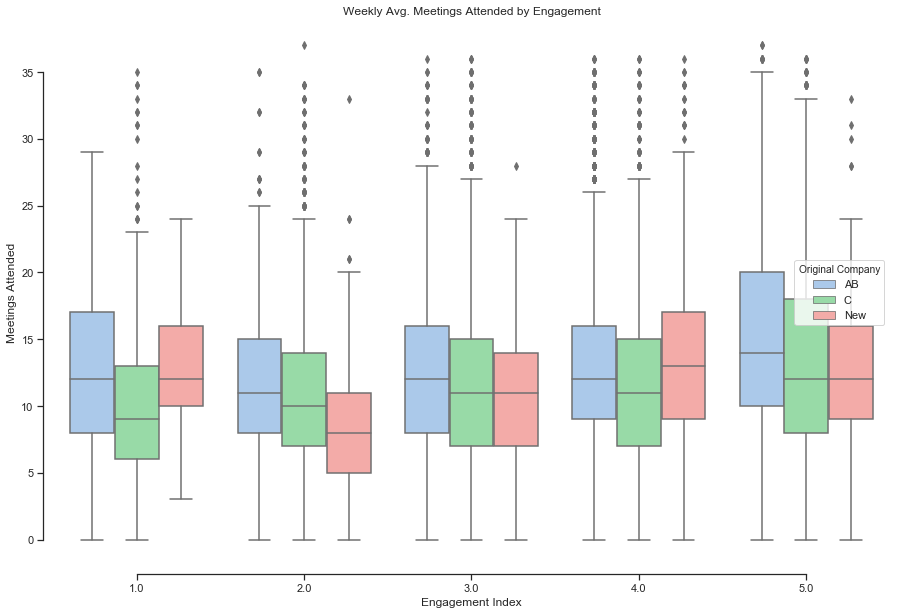

In [305]:
plt.figure(figsize = (15,10))
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Engagement Index", y="Meetings Attended",
            hue="Original Company", palette=["b", "g","r"],
            data=new_df).set_title('Weekly Avg. Meetings Attended by Engagement')
sns.despine(offset=10, trim=True)

##### Taking a look at the above graph, we get a sense of how many outliers there are in the data and also the weak feature correlations to Engagement--Meetings Attended is the second most correlated feature to Engagement and a trend is hardly recognizeable.

In [278]:
num_df = new_df.select_dtypes(include = ['float64','int64'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2540bed0>,
      dtype=object)

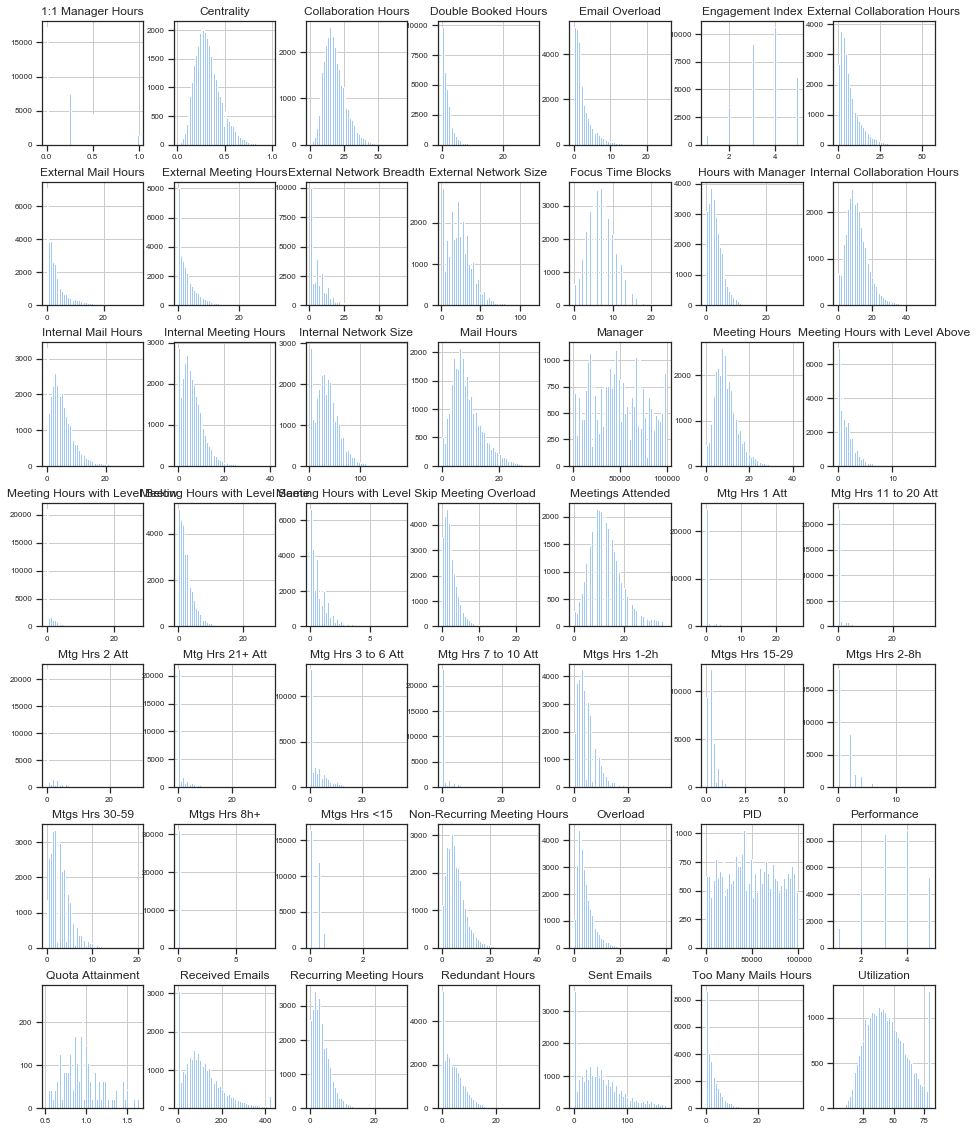

In [281]:
num_df.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

## Machine Learning Models

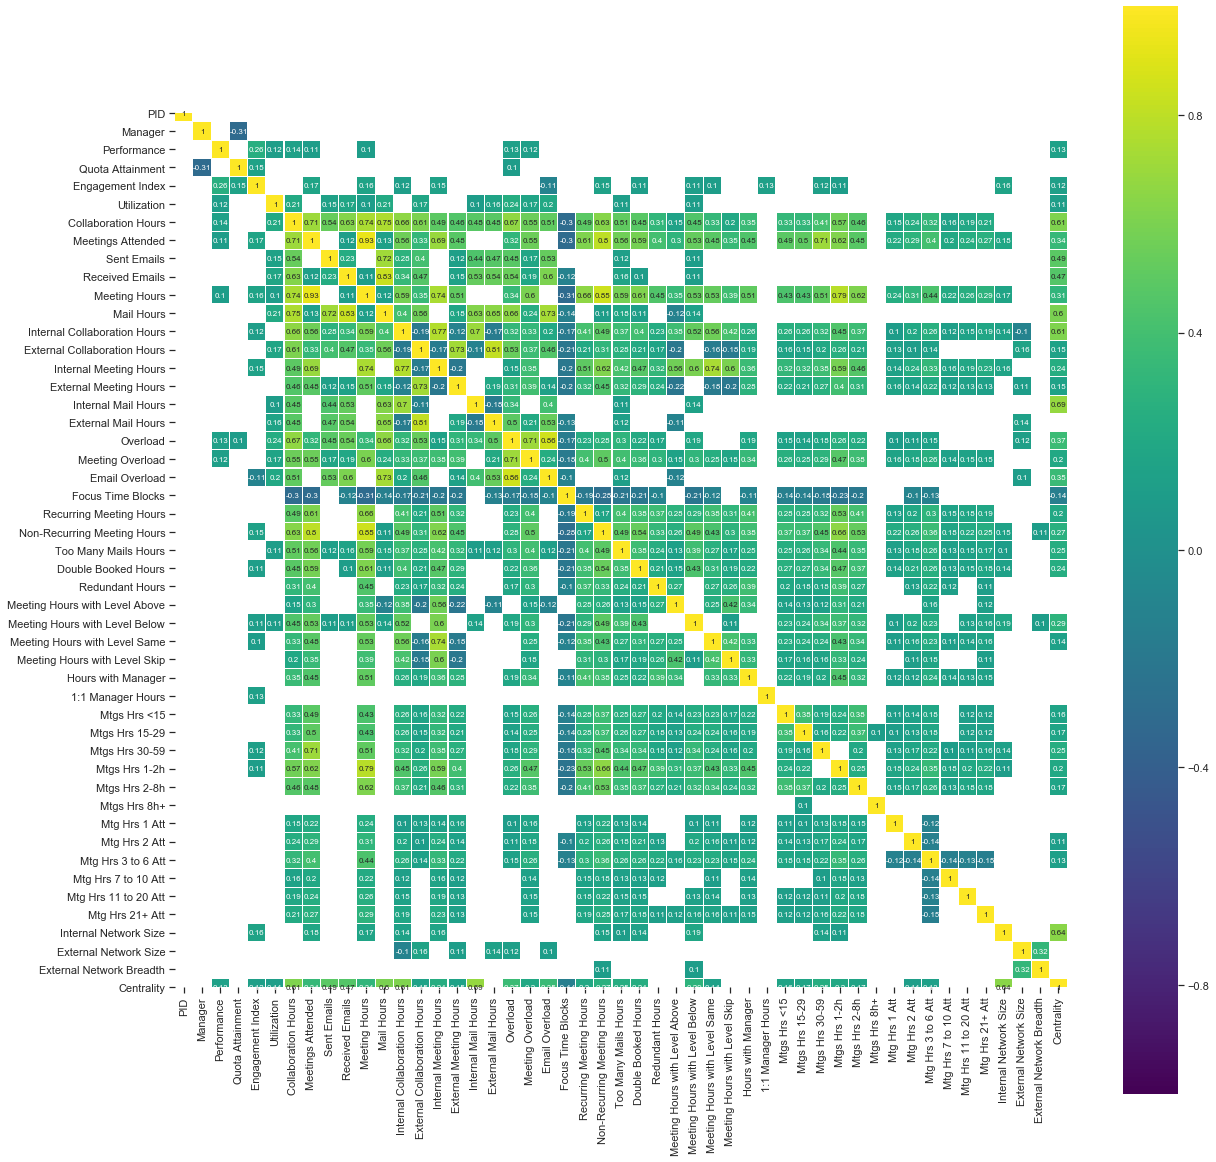

In [338]:
corr = new_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr[(corr>=0.1) |(corr<=-0.1)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True, annot_kws={'size':8}, square=True)

##### Above we see a heat map of feature correlation. This is useful in understanding which features essentially are the same and can be dropped from the data set so we don't have too many when training our model(s).

##### Let's first create the ammended data sets for non-sales, engagement index for training and testing only the relevant features and stripping out the features that are strongly correlated with each other and therefore redundant:

In [324]:
performance_data_set = non_sales_df[['Engagement Index','Collaboration Hours','Utilization','Performance']]
engagement_data_set = new_df[['Meetings Attended','Internal Network Size','1:1 Manager Hours',
                              'Email Overload','Engagement Index']]

### Multiple Linear Regression

In [329]:
# Create a training set and a test set

msk = np.random.rand(len(non_sales_df)) < 0.8
train_perform = performance_data_set[msk].dropna()
test_perform = performance_data_set[~msk].dropna()

In [331]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train_perform[['Engagement Index','Collaboration Hours','Utilization']])
y = np.asanyarray(train_perform[['Performance']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[0.27421703 0.01337593 0.00687723]]


In [332]:
y_hat= regr.predict(test_perform[['Engagement Index','Collaboration Hours','Utilization']])
x = np.asanyarray(test_perform[['Engagement Index','Collaboration Hours','Utilization']])
y = np.asanyarray(test_perform[['Performance']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 1.09
Variance score: 0.10


##### This is obviously a very poor predictor of performance, let's try engagement now

In [334]:
# Create a training set and a test set

ran = np.random.rand(len(new_df)) < 0.8
train_engage = engagement_data_set[ran].dropna()
test_engage = engagement_data_set[~ran].dropna()

In [335]:
x1 = np.asanyarray(train_engage[['Meetings Attended','Internal Network Size','1:1 Manager Hours',
                              'Email Overload']])
y1 = np.asanyarray(train_engage[['Engagement Index']])
regr.fit (x1, y1)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 0.02298128  0.00573375  0.43853403 -0.03522985]]


In [336]:
y_hat1= regr.predict(test_engage[['Meetings Attended','Internal Network Size','1:1 Manager Hours',
                              'Email Overload']])
x1 = np.asanyarray(test_engage[['Meetings Attended','Internal Network Size','1:1 Manager Hours',
                              'Email Overload']])
y1 = np.asanyarray(test_engage[['Engagement Index']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat1 - y1) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x1, y1))

Residual sum of squares: 0.94
Variance score: 0.07


##### Again we have a very poor predictor. We might have guessed given the weak correlations, but it was worth a try. Let's go now into classification machine learning and see if we can get some better results. Rather than being precisely wrong, as is often the case with regression, we'll not look at determining the precise level of performance or engagement, but try to determine if they fit into one of a few discrete categories. For example, will an employee make the sales quota or not, etc.

### Data Preparation

In [354]:
performance_data = df[['Engagement Index','Collaboration Hours','Utilization','Performance']].dropna()
X = performance_data[['Engagement Index','Collaboration Hours','Utilization']]
y = performance_data['Performance'].values

In [355]:
engagement_data = df[['Meetings Attended','Internal Network Size','1:1 Manager Hours',
                              'Email Overload','Engagement Index']].dropna()
X1 = engagement_data[['Meetings Attended','Internal Network Size','1:1 Manager Hours',
                              'Email Overload']]
y1 = engagement_data['Engagement Index'].values

#### Normalize Data

In [356]:
#Performance preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

#Engagement preprocessing
X1 = preprocessing.StandardScaler().fit(X1).transform(X1)

In [357]:
from sklearn.model_selection import train_test_split

#Performance data split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#Engagement data split into training and testing
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=4)

### K Nearest Neighbor

In [352]:
from sklearn.neighbors import KNeighborsClassifier

In [359]:
# Find the best K for performance

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = np.mean(yhat==y_test)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.26796188, 0.27217742, 0.27272727, 0.28024194, 0.28464076,
       0.28574047, 0.28592375, 0.2853739 , 0.29398827, 0.2960044 ,
       0.29618768, 0.30406891, 0.30883431, 0.31103372, 0.30498534,
       0.3066349 , 0.30553519, 0.30626833, 0.30461877])

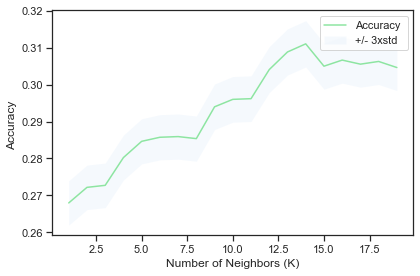

In [360]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

### The best K for the performance data set still only yielded a 31% accuracy score, so we won't pursue it any further

In [361]:
# Find the best K for engagement

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X1_train,y1_train)
    yhat=neigh.predict(X1_test)
    mean_acc[n-1] = np.mean(yhat==y1_test)

    
    std_acc[n-1]=np.std(yhat==y1_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.28842948, 0.27742581, 0.26742247, 0.29359787, 0.30726909,
       0.31843948, 0.31660554, 0.31960654, 0.32344115, 0.32594198,
       0.32177392, 0.33177726, 0.33911304, 0.33677893, 0.33744582,
       0.34394798, 0.34628209, 0.34594865, 0.34311437])

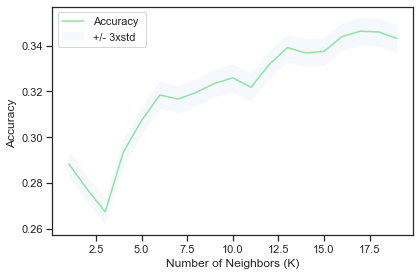

In [362]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

### The best K for the engagement data set only yielded a 34% accuracy score, so we likewise won't pursue it any further

### Decision Tree

In [378]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [366]:
dt_perform = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt_engage = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [368]:
dt_perform.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [369]:
dt_engage.fit(X1_train,y1_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [370]:
pred_perform = dt_perform.predict(X_test)
pred_engage = dt_engage.predict(X1_test)

In [391]:
print("Performance Jaccard Score: %.2f" % jaccard_score(y_test, pred_perform,average='weighted'))
print("Engagement Index Jaccard Score: %.2f" % jaccard_score(y1_test, pred_engage,average='weighted'))

Performance Jaccard Score: 0.17
Engagement Index Jaccard Score: 0.16


### Support Vector Machine

In [392]:
from sklearn import svm

In [395]:
clf_perform = svm.SVC(kernel='rbf',gamma='auto')
clf_perform.fit(X_train, y_train)

clf_engage = svm.SVC(kernel='rbf',gamma='auto')
clf_engage.fit(X1_train, y1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [401]:
svm_yhat_perform = clf_perform.predict(X_test)
print('Perform Jaccard Score: %.2f' %jaccard_score(y_test, svm_yhat_perform,average='weighted'))

Perform Jaccard Score: 0.17


In [400]:
svm_yhat_engage = clf_engage.predict(X1_test)
print('Engage Jaccard Score: %.2f' %jaccard_score(y1_test, svm_yhat_engage,average='weighted'))

Engage Jaccard Score: 0.20


### Logistic Regression

In [374]:
from sklearn.linear_model import LogisticRegression

In [377]:
LR_perform = LogisticRegression(C=0.01, solver='saga',multi_class='multinomial').fit(X_train,y_train)
LR_engage = LogisticRegression(C=0.01, solver='saga',multi_class='multinomial').fit(X1_train,y1_train)

In [386]:
yhat_lr_perform = LR_perform.predict(X_test)
yhat_lr_perform_prob = LR_perform.predict_proba(X_test)
yhat_lr_engage = LR_engage.predict(X1_test)
yhat_lr_engage_prob = LR_engage.predict_proba(X1_test)

In [389]:
print('Perform Jaccard Score: %.2f' %jaccard_score(y_test, yhat_lr_perform, average='weighted'))
print('Perform LogLoss Score: %.2f' %log_loss(y_test, yhat_lr_perform_prob))

Perform Jaccard Score: 0.15
Perform LogLoss Score: 1.44


In [390]:
print('Perform Jaccard Score: %.2f' %jaccard_score(y1_test, yhat_lr_engage, average='weighted'))
print('Perform LogLoss Score: %.2f' %log_loss(y1_test, yhat_lr_engage_prob))

Perform Jaccard Score: 0.20
Perform LogLoss Score: 1.37


## Major Findings:

##### There was no "smoking gun" and so many outliers in the behavioral data that it's difficult to say with any certainty that certain changes in behavior would neccessarily have the desired impact. The data and the background information did suggest that going back to the intial pre-merger strategy, remembering why the merger was done in the first place, and communicating/implementing these points to the team would be useful. Clearly not everyone is on the same page (look at sales). Employees, Managers, Directors, Executives need to be integrated and the new company culture needs to be emphasized and communicated effectively and often. 